# ANN: Artificial Neural Networks (Redes Neuronales Artificiales)

## Introduccion:
* Son mas generales que la regresion lineal. Resuelve problemas no lineales.

* Son los aproximadores universales.
[universal approximators](https://en.wikipedia.org/wiki/Universal_approximation_theorem).
Es decir que casi cualquier funcion (casi es todas menos excepciones que no son practicas en la vida real) de $\mathbb{R}^n \to \mathbb{R}^m$. Siempre y cuando tenga el numero de capas adecuadas con profundidad (numero de capas) $d=\max\{n+1, m, 2\}$

* Ininicialmente se pueden ver como cajas negras pero en esta clase vamos mirarlas por dentro.

Para apreciar la importancia de las redes neuronales, pensemos en el problema de clasificacion, como lo hicimos con regresion pero usando imagenes de $100 \times 100$ pixeles. Que no son muy grandes.

Si quisieramos pensar en el problema como no lineal, el polinomio de orden mas bajo no lineal es de orden 2 (cuadratico).
Pensemos que cada pixel (hay 10000) es una variable.

En general el polinomio de orden 2, en $n$ variables se puede escribir como


$$\theta_0 + \theta_1 x_1 + \cdots + \theta_n x_n + \theta_{n+1} x_1 x_2 + \cdots + \theta_m x_{n-1} x_m + \theta_{m+1} x_1^2 + \cdots + \theta_q x_n^2 $$
donde $q+1$ es el total de numero de terminos o parametros.


Pensemos en el costo computacional. Usando combinatoria.
Queremos saber cuanto es $q+1$. Tenemos el siguiente numero de variables $1, x_1, x_2, \cdots, x_n$. Se tiene productos de estas variables de la forma

$$1^{i_0} x_1^{i_1}  x_2^{i_2} \cdots x_n^{i_n} $$
Estos son los coeficientes de los $\theta_k$.
Como el polinomio es cuadratico las potencias suman maximo 2.
Veamos como estas potencias pueden sumar exactamente 2.
Es decir

$$i_0 + i_1 + \cdots i_n = 2 $$
donde $i_j = 0, 1, 2$, $j=0,1, \cdots, n$.


Por ejemplo $\theta_0$ se obtiene con $i_0=2$, $i_j=0$, $j=1,2, \cdots, n$.

Otro ejemplo, el termino $\theta_n x_n$, en este caso
$i_0=1, i_n=1$, $i_j=0$, $j \ne 0, j \ne 1$, $j \ge n$

Ultimo ejemplo: El termino $\theta_{m+1} x_1^2$. Se genera con
$i_0=0, i_1=2$ y $i_k=0$, $k \ne 1$.


Este es un problema de combinatoria donde se requiere encontrar el numero de posibilidades de

$i_0 + i_1 + \cdots + i_n=2$.
De cuantas formas se puede sumar estos para que de 2. Cuantas soluciones tiene esta ecuacion Diofantina. En el apendice la solucion para

$i_1 + i_2 + \cdots + i_n=m$.
esta dado por

$$\binom{n+m-1}{n} $$
En nuestro caso, como empezamos desde 0, tenemos que para

$i_0 + i_1 + \cdots + i_n=m$.
El numero de combinaciones es
$$\binom{n+m}{n} $$

**Repaso**: El coficiente binomial

$$\binom{n}{m} = \frac{n!}{m!(n-m)!} $$
Un significado de $\binom{n}{m}$ es cuantos subconjuntos de $m$ elementos hay en un conjunto de $n$ elementos (asumiendo $n>m$).

En nuestro caso, pensemos en un polinomio en dos variables de grado 2.

$$\theta_0 + \theta_1 x_1 + \theta_2 x_2  + \theta_3 x_1 x_2 + \theta_4 x_1^2 + \theta_5 x_2^2 $$
Aca $q+1=6$.
Veamos que realemente es asi, para $n=m=2$.


$$\binom{n+m}{m} = \binom{4}{2} = \frac{4!}{2! 2!} = \frac{4 \times 3 \times 2}{2 \times 2} = 6 $$


Retornando a $n$ variables con grado 2 tenemos (teorema de simetrica del triangulo de Pascal)


$$\binom{n+2}{2} = \binom{n+2}{n}= \frac{(n+2)!}{n! 2!}= \frac{(n+1)(n+2)}{2} $$
Es del orden $\mathcal{O}(n^2)$
Pensemos ahora que tenemos una imagen de $100 \times 100=10000$ pixeles.

Cual es el numero de terminos $q+1$ del polinimo de grado 2 con estas variables?

$$\binom{10002}{10000} = \frac{(10001)(10002)}{2} = 50015001. $$
Piense que quiere hacer una regresion logistica pixel a pixel. Esto da un numero muy grande. Veamos el caso de orden $m=3$.

$$q+1 = \text{count} = \binom{10003}{3} = \frac{10003 \times 10002 \times 10001}{6} = 166766685001 $$

Este es mas o menos $10^11$. Ahora la matrix de regresion es de orden $m \times n$, donde normalmente $m > n$, pero $n=10^{11}$ o sea que esa matriz tiene mas de $10^{22}$ componentes.

La propuesta de resolver un problema de clasificacion en imagenes donde las variables son los pixeles se descarta inmediatamente.

Una solucion a este problema de clasificacion **no lineal** es las redes neuronales que veremos en este capitulo.

## Historia.
En las notas de clase (el texto guia) tenemos 6  o 7 items. Vamos, hoy a ver los mas importantes.

* 1943: Dos cientificos, Warren McCulloch (neurofisiologo) y Walter Pitts (joven matematico) desarrollaron un modelo que convierte senhales neuronales (impulsos electricos) en resultados discretos. Logicos. Fue el primero asomo de redes neuronales artificiales. A este modelo (que lo estudiamos hoy con mucho mas detalles, lo llamos McCulloch-Pitts model).

* 1958: Frank Rosenblatt desarrollo un modelo llamado **perceptron** en el Cornell Aeronautical Laboratory.

Veamos una figura.


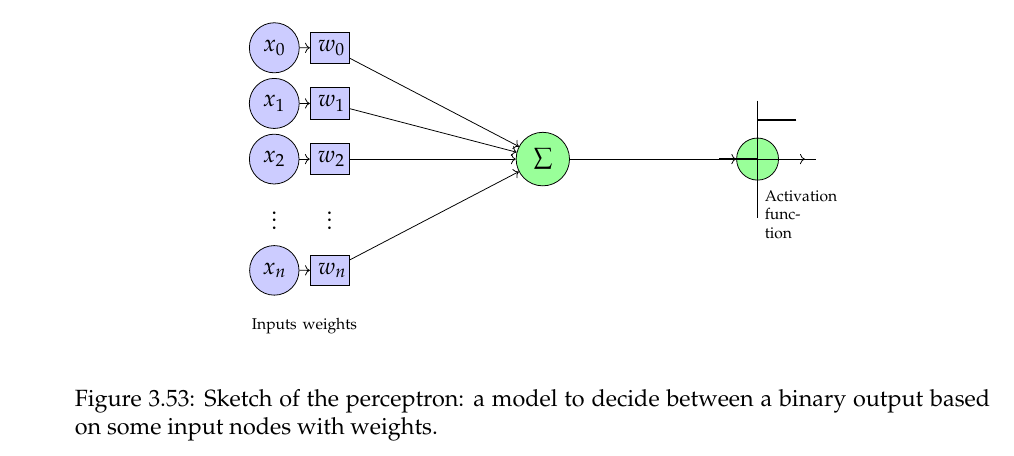

* El AI winter tambien ataco a las redes neuronales. (mas o menos entre 1965 y 1985).

* El los 90s hubo contribuciones de redes neuronales importantes. Yan Lecunn con redes neuroanles convolucionales para clasificacion de imagenes (el MNIST).


* A los 2012. El computer vision se desarrollo grandemente. El AlexNet (del grupo de Jeffrie Hinton en Tonto) gano el ImageNet conconcurso e impulso el **computer vision**.

* A los 2018-2019 el LLM gano mucho terreno (NLP:Natural Language Processing). Vino el ChatGPT .

* La busqueda en este momento es para el AGI: Artificial General Intelligence.

## Aplicaciones:
* image recognition
* Cancer detection
* Voice recongition
* translation
* musical composition
* LLMs (ChatGPT, Gemini, Llama, etc)
* Autonomous driving.
* etc.

Teoria: Las ANN se basan parcialmente en las neuronales biologicas. La Figura 3.54



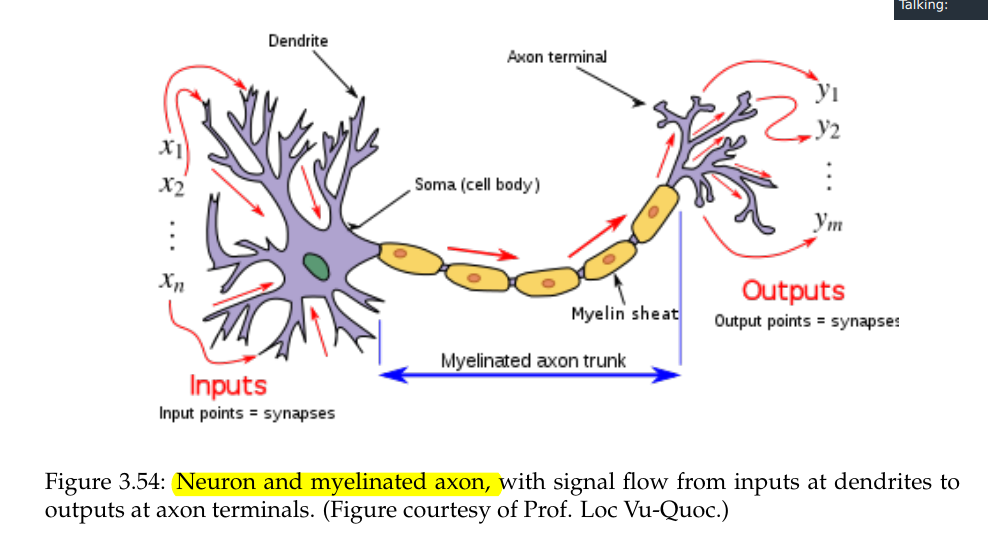

La idea del perceptron se puede describir con un cuento.
Asuma que usted va de viaje: Existen varios parametros

* Distancia desde su casa.
* Modo de transporte: caminando, avion, carro, bote, etc.
* Clima del lugar del destino.
* costo de hotel y transporte.
* etc.
Para cada uno de estos parametros exiten **pesos** ($w_i$).
En nuestro caso

* Que tan lejos le gusta viajar?.
* Que tanto miedo le tiene a un avion o a un barco?
* Que tanto dinero esta dispuesto a gastar.
* Que tan bueno es para temperaturas bajo cero, o alta humedad.
* etc.

Los pesos pueden ser positivos para cosas que quiere y negativos para cosas que rechaza. Al final es un promedio ponderado $\sum w_i x_i$ lo que necesita para tomar una decision. Fija un umbral $t$

Si $\sum w_i x_i < t$ no va al viaje
Si $\sum w_i x_i \ge t$ si va al viaje

Para entrar en materia veamos algunos modelos de McCulloch and Pitts. Estos son modelos logicos. Los modelos de McCulloch and Pitts tiene variables binarias con valores 1 o 0.
Los pesos son 1 o 0.

* Modelo **or**: (el "o" disjuntivo)

|  $x_1$ |  $x_2$ | $$\sum x_i=x_1 + x_2$$ | $$\ge \text{threshold}$$  |  $$x_1 \text{ or } x_2$$ |
|---|---|:--------:|-------|:-------:|
| 1  |  1 |   2|  1 |  1 |
|  1 |  0 |  1 |   1|  1 |
| 0  |  1 | 1  |  1 |  1 |
| 0  |  0 | 0  |  1 |  0 |





El "or" solo es verdad si por lo menos una de las variables booleans es cierta.

Veamos la neurona de McCullo-Pitts en accion.

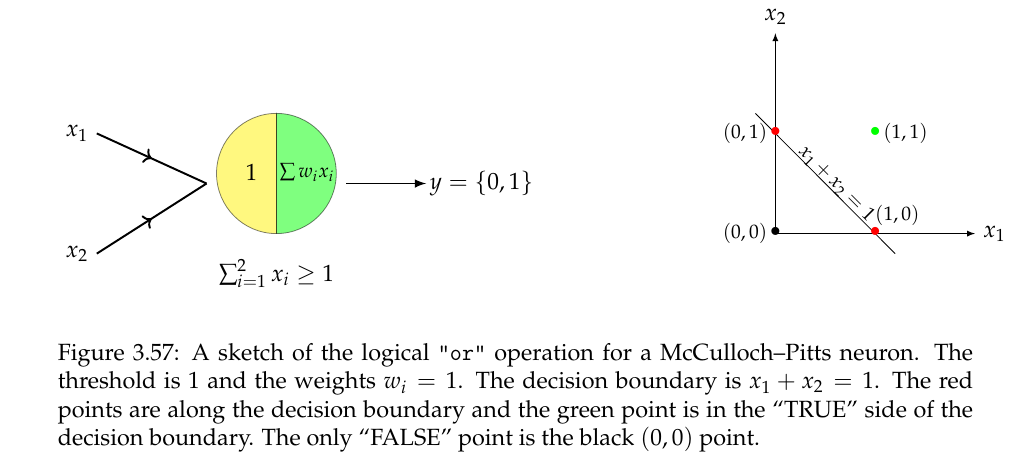

El modelo **and** (y) de McCulloch-Pitts es:

| $$x_1$$ | $$x_2$$ | $$ \sum \theta_i x_i = x_1 + x_2 $$ | $$ \ge \text{threshold} $$ | $$ x_1 \text{ and } x_2 $$ |
| ------ | ----- |:----:|:-----:|:-----:|
| 1 | 1 | 2 | 2 | 1 |
| 1 | 0 | 1 | 2 | 0 |
| 0 | 1 | 1 | 2 | 0 |
| 0 | 0 | 0 | 2 | 0 |



La conjuncion logica "y" es verdad solo si ambas premisas con ciertas.

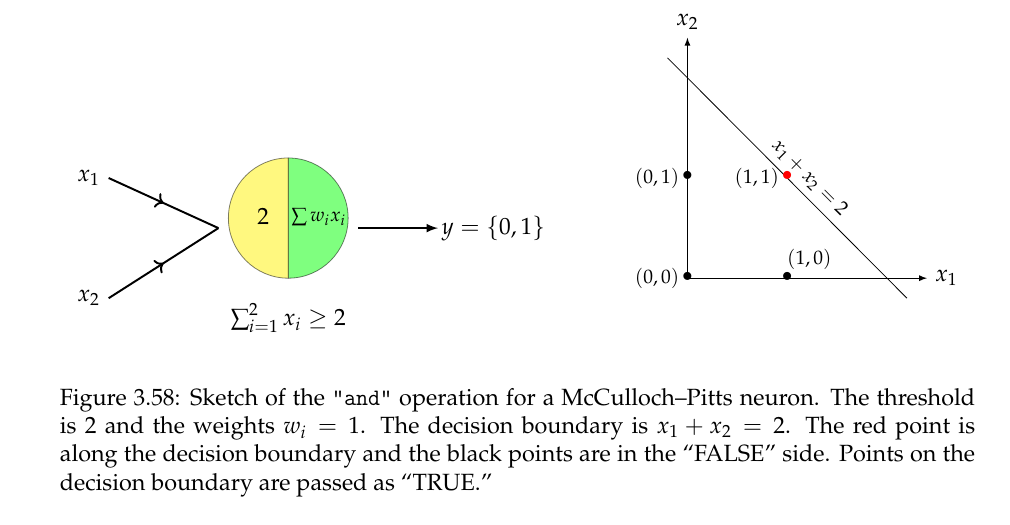

El **nor** (ni lo uno , ni lo otro). En este caso la decision es la conjuncion de las negaciones no a y no b.

Veamos la tabla.

| $$x_1$$ | $$x_2$$ | $$ \sum \theta_i x_i = -x_1 -x_2 $$ | $$ \ge \text{threshold} $$ | $$ x_1 \text{ nor } x_2 $$ |
| ------ | ----- |:-------:|:-----:|:-----:|
| 1 | 1 | -2 | 0 | 0 |
| 1 | 0 | -1 | 0 | 0 |
| 0 | 1 | -1 | 0 | 0 |
| 0 | 0 | 0 | 0 | 1 |


Note que en este caso los pesos son $w_1 = w_2 = -1 = \theta_1 = \theta_2$. El umbral (threshold) es 0.

El nor tambien tiene su neurona de McCulloch-Pitts y la decision boundary. Tarea para el estudiante.

A las 8:00 pm?

El operador **xor** (or exclusivo). Es cierto solo cuando uno y solo uno de las dos premisas sea cierta.


| $$x_1$$ | $$x_2$$ | $$ \sum \theta_i x_i = x_1 + x_2 $$ | $$ \ge \text{threshold} $$ | $$ x_1 \text{ xor } x_2 $$ |
| ------ | ----- |:----:|:-----:|:-----:|
| 1 | 1 | 2 | ? | 0 |
| 1 | 0 | 1 | ? | 1 |
| 0 | 1 | 1 | ? | 1 |
| 0 | 0 | 0 | ? | 0 |



El modelo de McCulloch-Pitts es incapaz de predecir el operador xor. No existe un umbral (threshold) que satisfaga este operador. Veamos al menos una razon para esto.

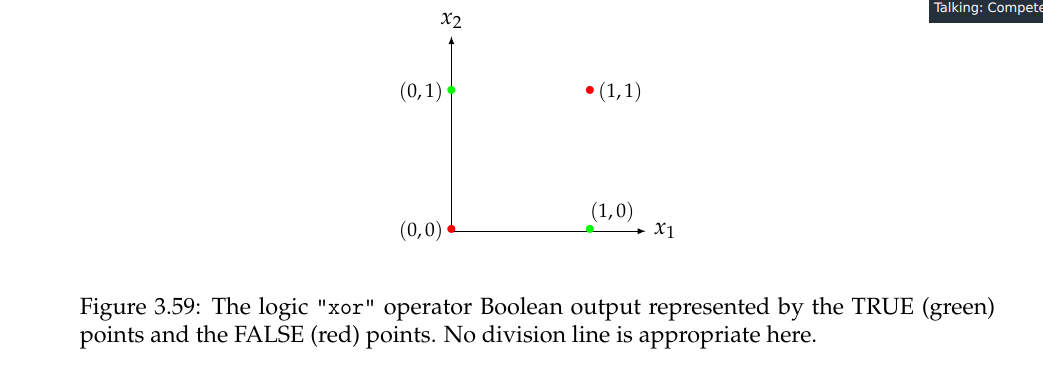

Esto nos motiva a alejarnos del modelo McCulloch-Pitts y mas hacia el modelo del Perceptron  con varias capas. Vamos a estudiar el perceptron con una capa de entrada, una oculta (hidden) y una de salida. Antes de esto estudiamos unas funciones que se llaman **de activacion** que son las que permiten que las ANN sean **no lineales**.

## Funciones de Activacion.
En unos minutos mostramos capas de las ANN y entre-capa-y-capa debe haber una funcion no lineal (para quebrar la linealidad). Esta funcion se llama de activacion. Aca vemos algunas.

* La identidad. La identidad $I(x)=x$ no hace nada. El sistme de ANN se comporta exactamente como una regresion lineal. Entonces esta activacion no rompe la linealidad.


* La heaviside (step function, funcion escala)

$$
H(t)=
\begin{cases}
1 \quad , \quad \text{si } t > 0 \\
0 \quad , \quad \text{si } t \le 0 \\
\end{cases}
$$



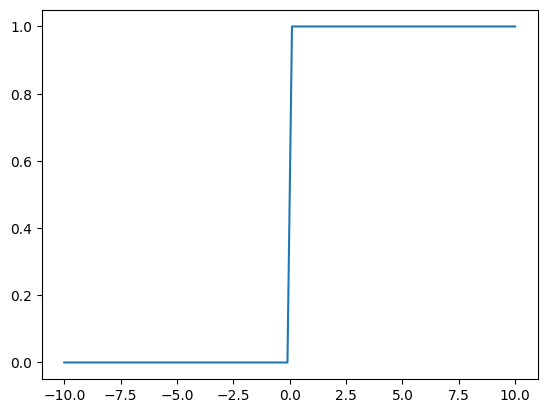

In [2]:
# graficamos la funcion Heaviside
import numpy as np
import matplotlib.pyplot as plt

def heaviside(t):
    return np.heaviside(t, 0)

# graph the funcion
t = np.linspace(-10, 10, 100)
plt.plot(t, heaviside(t))

** Logistic Sigmoid:

$$\sigma(t) = \frac{1}{1+ \exp(-t)} $$



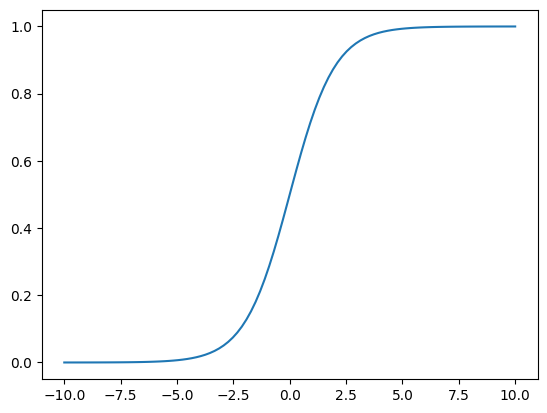

In [3]:
# graph the sigmoid function
def sigmoid(t):
    return 1/(1+np.exp(-t))

t = np.linspace(-10, 10, 100)
plt.plot(t, sigmoid(t))

* Tangente hiperbolica.

$$\tanh(t) = \frac{\sinh (t)}{\cosh (t)} =  \frac{\mathrm{e}^t - \mathrm{e}^{-t}}{\mathrm{e}^t + \mathrm{e}^{-t}} $$

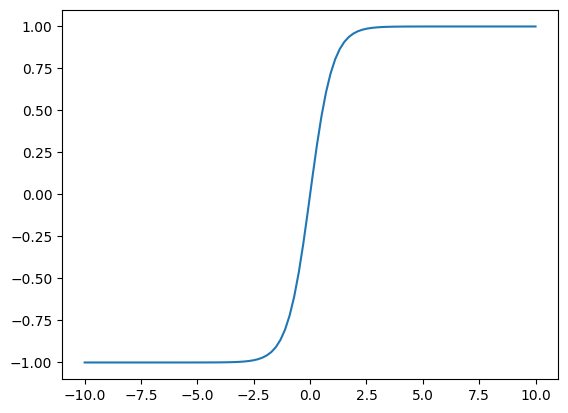

In [4]:
# graph tanh
def tanh(t):
    return np.tanh(t)

t = np.linspace(-10, 10, 100)
plt.plot(t, tanh(t))

Tanto la sigmoid logistic como la tanh tienen un gradiente muy pequenho para valores lejanos a 0. Esto genera un problema por que en la ecuacion
$$\theta^{(k+1)} = \theta^{(k)} - \alpha \nabla J(\theta^{(k)} $$
practicamente $\theta^{(k+1)} \approx \theta^{(k)}$, no hay "update". A este problema se le conoce como el **vanishing gradiente problem**.

Debido a esto en los tempranos 2000 se cambiaron estas activaciones por otras mas estables. La primera de estas es la
ReLU (Rectified Linear Unit).

$$
\text{ReLU}(t) = \max \{ 0 , t \} =
\begin{cases}
t \quad , \quad \text{si } t > 0 \\
0 \quad , \quad \text{si } t \le 0 \\
\end{cases}
$$



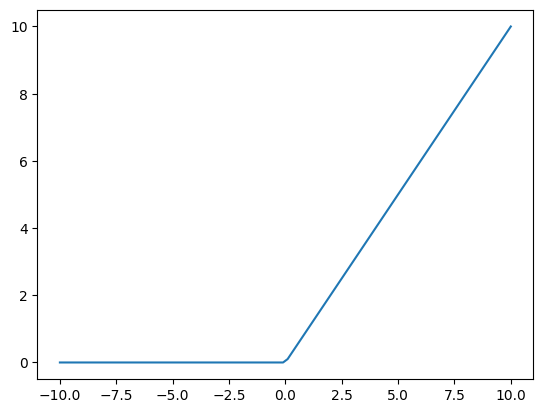

In [5]:
# graph the ReLU function
def relu(t):
    return np.maximum(0, t)

t = np.linspace(-10, 10, 100)
plt.plot(t, relu(t))


En el caso de $t<0$ tendriamos el problema del "vanishing gradient". A esto lo llaman la dying ReLU neuron.

Entonces se creo otra activacion donde para $t<0$ fuera la pendiente no 0 (aunque pequenha).
A esta se le llama el **leaky ReLU**.
Veamosla en `Python`

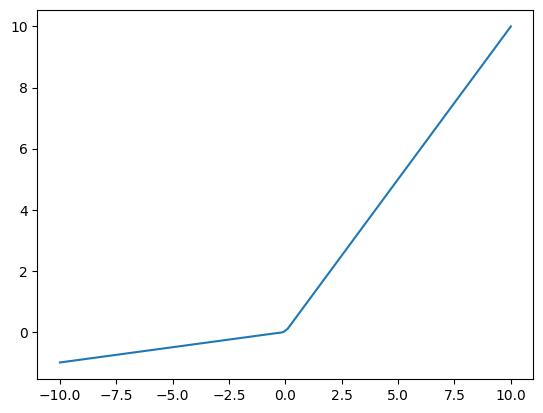

In [7]:
# graph the leaky ReLU
import numpy as np
import matplotlib.pyplot as plt

def leaky_relu(t):
    return np.maximum(0.1*t, t)

t = np.linspace(-10, 10, 100)
plt.plot(t, leaky_relu(t))

La esquina en $t=0$ puede ser molesta. Entonces se introduce la
ELU: exponential linear unit.

$$\text{ELU}(t) =
\begin{cases}
\alpha ( \mathrm{e}^t - 1) \quad , \quad t< 0 \\
t \quad , \quad t \ge 0
\end{cases} $$

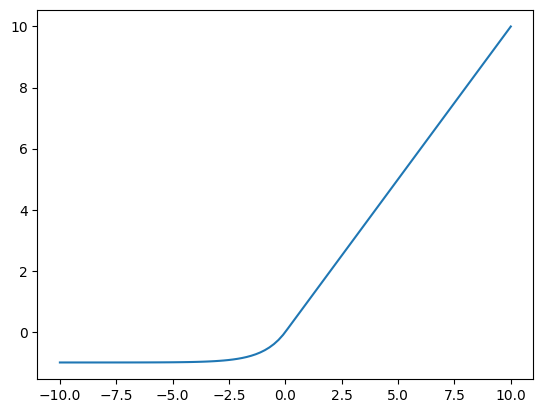

In [10]:
# graph the ELU function
import numpy as np
import matplotlib.pyplot as plt

def elu(t, alpha = 1):
    return np.where(t<0, alpha*(np.exp(t)-1), t)

t = np.linspace(-10, 10, 100)

# graph the function
plt.plot(t, elu(t))

[Keras](https://keras.io/api/layers/activations/) contiene una libreria de funciones de activacion muy completa. Muchas mas de las que mostramos aca. Pero las que mostramos son las mas populares.

La ultima importante es la **softmax** (explicada en la clase anterior.)

Esta una funcion (activacion) de probabilidad que arroja $K$ resultados para $K$ clases.
Es una generalizacion de la logistic sigmoid $\sigma$

\begin{eqnarray}
\sigma : \mathbb{R}^K &\to& [0,1]^K \\
(z_i) &\mapsto& \sigma(z_i) = \frac{\exp(z_i)}{\sum_{j=1}^K \exp(z_j)} \quad , \quad i=1,2, \cdots , K \quad , \quad z_i \in \mathbb{R}.
\end{eqnarray}
Esta funcion tiene la caracteristica de que es positiva con rango en $[0,1]$. Las commponentes $\sum_{i=1}^K \sigma(z_i)=1$



### ANN: Construccion
Las ANN tienen dos partes:
* Forward Propagation (propagacion hacia adelante)
* Backpropagation (propagacion hacia atras).

#### Forward Propagation.
Entramos en el dominio del perceptron con una capa de entrada  una oculta (hidden) y una de salida.

Vamos a ir por partes. De lo mas simple a lo mas complejo.

* Un nodo de entrada, uno oculto y uno de salida.

Un ejemplo donde solo se use un nodo es la McCulloch-Pitts negacion.



| $$x$$ | $$\sum \theta_i x_i = - x $$ | $$ \ge \text{threshold} $$ | $$ \text{not  }  x$$
| ------ | ------------- | ----------------| -------------- |
| 1 | -1 | 0 | 0 |
| 0 | 0 | 0 | 1 |

Pero este no es el caso del perpeptron.

Veamos la grafica.




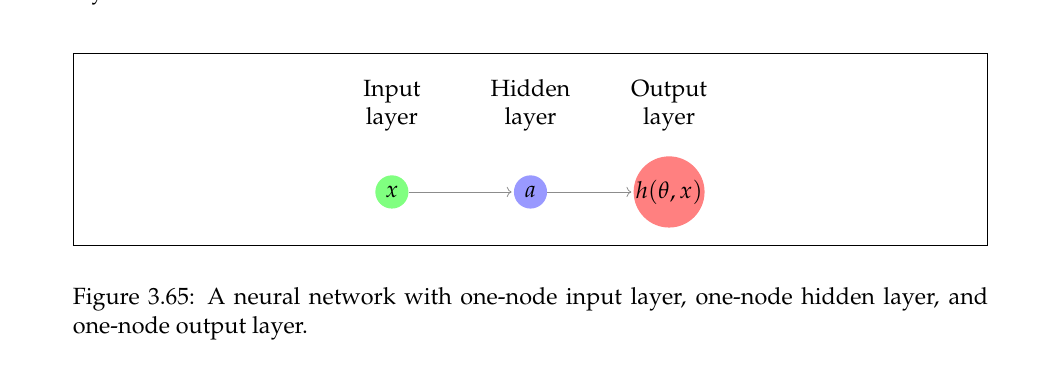

El proceso de la propagacion hacia adelante en la Figure 3.65 es el siguiente.

* La entrada es $x$ (un escalar). Esta entrada se pesa con un peso $\theta^{(1)}$  (peso que sale de la capa 1. Esta parte del problema es lineal y se resume en la ecuacion

$$z^{(2)} = x \theta^{(1)} $$

* Calculamos la **activacion** $a$. Vamos a usar para todos los ejemplos la funcion logistica (sigmoid).

$$a^{(2)} = S(z^{(2)}) = \frac{1}{1 + \mathrm{e}^{-z^{(2)}}} $$

* Vamos a la segunda activacion (de salida $a^{(3)}$, pero antes necesitamos $z^{(3)}= a^{(2)} \theta^{(2)}$  esta es la parte lineal. La parte no lineal es la salida

$$a^{(3)} = h(\theta, x) = S(z^{(3)}) = \frac{1}{1 + \mathrm{e}^{-z^{(3)}}}. $$

* Varios nodos de entra, un nodo oculto y uno de salida.

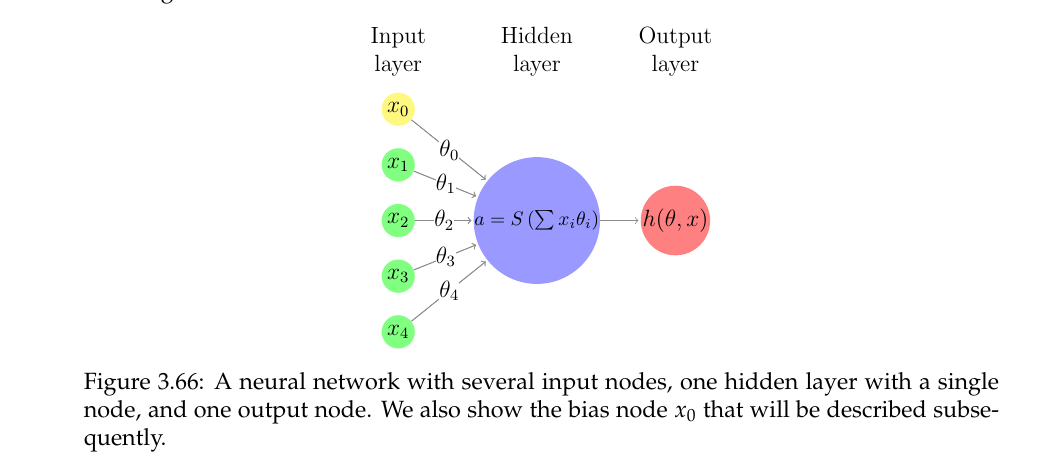

Describimos la matematica detras del modelo en la Figura 3.66

* Los datos de entrada $x_0, x_1, \cdots , x_4$. Con estos datos de entrada y los pesos $\theta_0, \theta_1, \cdots, \theta_4$ calculamos el **producto interno** (suma ponderada).

$$z^{(2)} = x_0 \theta_0 + x_1 \theta_1 + x_2 \theta_2 + x_3 \theta_3 + x_4 \theta_4  = \sum_{i=0}^4 \theta_i x_i $$

Generalicemos un poco mas

$$z^{(2)} = \sum_{i=0}^n \theta_i x_i = x^T \Theta = \langle x, \Theta \rangle  $$
donde $x=(x_0, x_1, \cdots, x_n)^T$, y $\Theta=(\theta_0, \theta_1, \cdots, \theta_n)^T$.

Este proceso es lineal.

* El siguiente paso es **romper** esta linealidad con la activacion $S$

    $$a^{(2)} = S(z^{(2)}) = \frac{1}{1+ \mathrm{e}^{-z^{(2)}}}$$

* Obtenemos la neurona de salida (roja) en dos pasos. La parte lineal

$$z^{(3)} = \theta^{(2)} a^{(2)} = a^{(2)} \theta^{(2)} $$
Calculamos la salida o hipotesis

$$a^{(3)} = S(z^{(3)}) = h(\theta, x) = \frac{1}{1 + \mathrm{e}^{-z^{(3)}}}. $$

* El siguiente nivel de complejidad corresponde a varios nodos de entrada, varios ocultos y uno de salida.




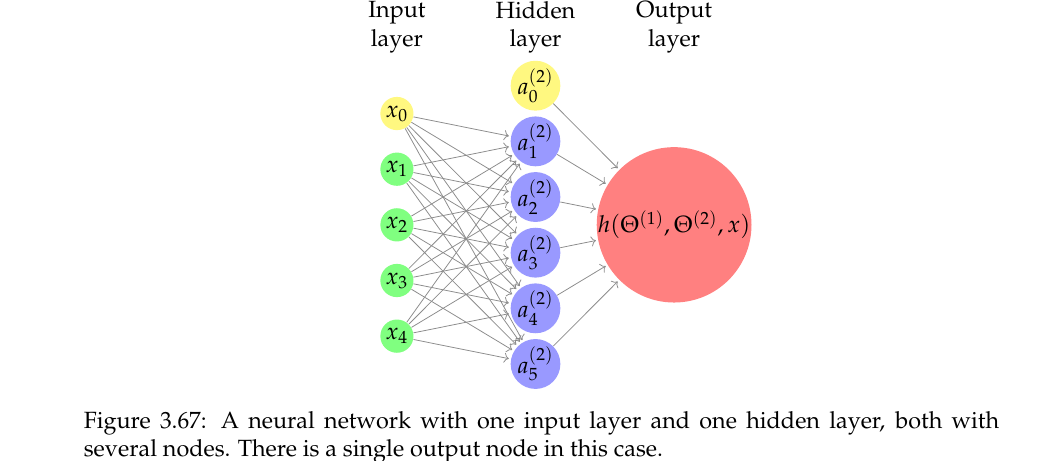

Describimos la matematica (propagacion hacia adelante) de la Figura 3.67.

* Inicialmente tenemos los datos de entrada $x_0, x_1, \cdots, x_n$. La parte lineal es la suma ponderada con pesos $\theta_{01}, \theta_{02}, \theta_{0n}, \theta_{11}, \theta_{12} \cdots, \theta_{np}$.
Tenemos que ser mas cuidadosos en el computo de la parte lineal.

$$z_1^{(2)} = \sum_{j=1}^n x_j \theta_{j1}^{(1)} $$
$$z_2^{(2)} = \sum_{j=1}^n x_j \theta_{j2}^{(1)} $$
$$ \vdots = \vdots $$
$$z_p^{(2)} = \sum_{j=1}^n x_j \theta_{jp}^{(1)} $$

Esto se puede vectorizar, de la siguiente forma


$$z^{(2)} = x^T \Theta^{(1)} \tag{1} $$
donde $\Theta$ es una matriz de orden $n \times p$. $x$ es el vector de entrada.

La ecuacion (1) es un vector fila. Se puede pensar en vector columna en vez de vector fila y escribir

$$z^{(2)} = (\Theta^{(1)})^T x $$

* El siguiente paso es calcular la capa de activacion (morada)
El nodo amarillo $a_0^{(2)}=1$.
Los morados se obtienen a traves de la composicion con la sigmoid logistic $S$, es decir

$$a_i^{(2)} = \frac{1}{1 + \mathrm{e}^{-z_i^{(2)}}} \quad , \quad i=1,2, \cdots, p $$
componente-a-componente.

* El paso final es obtener la hipotesis, en dos pasos. La parte lineal

$$z^{(3)} = \sum_{j=0}^p a_j^{(2)} \theta_j^{(2)} $$
y ahora la activacion (hipotesis)

$$h(\theta, x) = \frac{1}{1 + \mathrm{e}^{-z^{(3)}}}$$




* El siguiente nivel de complejidad es varios de entrada, varios ocultos y varios de salida. Ver la Figura 3.68

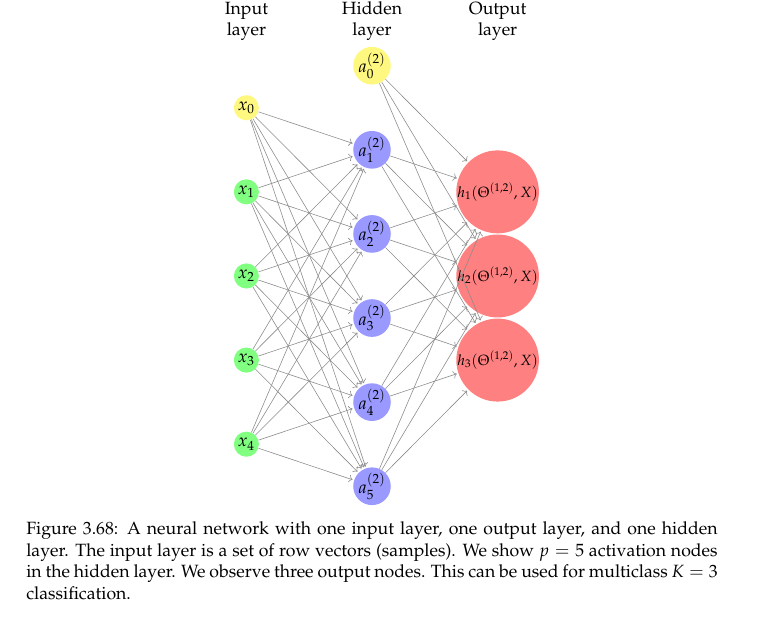

La matematica es parecida. Veamos

* Encuentre $z_i^{(2)}$ como el producto de la matriz $\Theta^{(1)}$ por $x$

$$z_i^{(2)} = x^T \Theta_i^{(1)} \quad, i = 1,2, \cdots, p $$

* Aplicamos la sigmoid logistic

$$a_i^{(2)} = \frac{1}{1 + \mathrm{e}^{-z_i^{(2)}}} $$

* Encontramos $z^{(3)}$ como

$$z_i^{(3)} = \sum_{k=0}^p a_k^{(2)} \theta_{ki}^{(2)} \quad , i=1,2, 3 $$
Esto se puede vectorizar como

$$z_i^{(3)} = a^{(2)} \Theta_i^{(2)} $$
donde $\Theta_{(p+1) \times 3}^{(2)} $
y $a^{(2)}$ es un vector fila de $0$ hasta $p$.

Finalmente hay tres hipotesis

$$ h_i(\Theta, x) = \frac{1}{1 + \mathrm{e}^{-z_i^{(3)}}} $$
$i=1,2,3$.

* Ultimo caso , vectores de entrada, varios nodos ocultos y de salida. Ya los $x$ no son vectores sino matrices.

$$z_{ij}^{(2)} = \sum_{k=0}^n x_{ik} \theta_{kj}^{(1)} \quad, \quad i=1, \cdots, m \quad , \quad j=0, \cdots, p  $$



De forma matricial podemos escribir esto como

$$Z^{(2)} = X \Theta^{(1)} $$
con dimensiones
$$Z_{m \times (p+1)}^{(2)} =X_{m \times n} \Theta_{n \times (p +1)},  $$

donde $X$ es una matriz con $n$ features y $m$ datos.

$$a_{ij}^{(2)} = \frac{1}{1 + \exp(-z_{ij}^{(2)})} $$

o de forma vectorizada

$$A^{(2)} = \frac{1}{1 + \mathrm{e}^{-Z^{(2)}}} $$

Finalmente

$$h_j^{(i)}( \Theta^(2), A^{(2)}) = \frac{1}{1 + \exp
\left (-\sum_{k=0}^p a_{ik}^{(2)} \theta_{kj}^{(2)} \right ) } $$
